### Customer Segmentation with k-Means

Let's use *k*-means clustering to tackle a real-world problem: segmenting customers based on customer data to identify which customers to target with a campaign for a new product or a promotion to increase their purchasing activity. 

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [1]:
# load the customer dataset using pandas:
import pandas as pd

customers = pd.read_csv('customer_data.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# How many rows and columns does the dataset contain?
print(customers.shape)

(200, 5)


Text(0, 0.5, 'Spending Score')

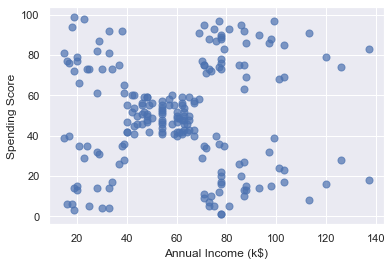

In [4]:
# Extract the annual-income and spending-score values and plot them:
points = customers.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

Text(0, 0.5, 'Inertia')

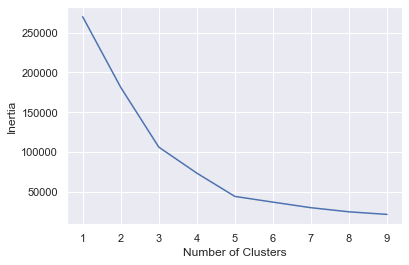

In [5]:
# determine the optimum number of clusters using the elbow method:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

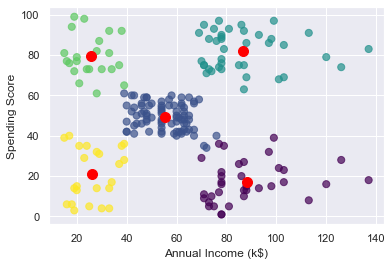

In [6]:
# segment the customers using 5 clusters:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [7]:
# Create a DataFrame containing customer data:
df = customers.copy()

# add a column named "Cluster" with the index of each customer's cluster:
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


### Segmenting customers using 2 attributes

Let's generate a list of customers who fall into the lower-right cluster (customers with high incomes but low spending scores).  These might be great customers to target with a promotion to entice them to buy more of your product.

In [9]:
# cluster index for a customer with a high income and low spending score:
cluster = kmeans.predict(np.array([[120, 20]]))[0] 

# filter the DataFrame to include only customers in that cluster:
clustered_df = df[df['Cluster'] == cluster] 

# print the customer IDs:
print( clustered_df['CustomerID'].values )

[125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]


### Segmenting customers using all attributes

Next, let's segment the customers again, this time using everything except the customer IDs. Start by replacing the strings "Male" and "Female" in the "Gender" column with 1s and 0s, a process known as *label encoding*. This is necessary because machine learning can only deal with numerical data.

In [12]:
from sklearn.preprocessing import LabelEncoder

df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Text(0, 0.5, 'Inertia')

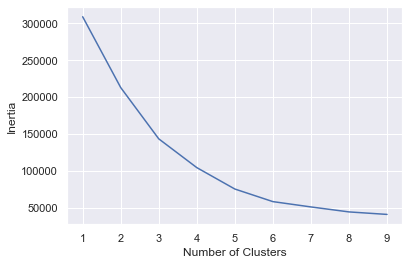

In [15]:
# extract the values in the gender, age, income, and score columns:
points = df.iloc[:, 1:5].values

# determine the optimum number of clusters based on these features (elbow method):
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [16]:
# segment the customers into five clusters again:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)

KMeans(n_clusters=5, random_state=0)

In [17]:
# add a "Cluster" column with the index of each customer's cluster:
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


In [18]:
# compute the average age of the customers in each cluster:
print(df.groupby('Cluster')['Age'].mean())

Cluster
0    45.217391
1    32.692308
2    43.088608
3    40.666667
4    25.521739
Name: Age, dtype: float64


In [19]:
# print a report showing a complete list of stats for every cluster:
results = pd.DataFrame(columns = ['Cluster', 'Average Age', 'Average Income', 'Average Spending Index', 'Number of Females', 'Number of Males'])

for i in range(len(kmeans.cluster_centers_)):
    age = df[df['Cluster'] == i]['Age'].mean()
    income = df[df['Cluster'] == i]['Annual Income (k$)'].mean()
    spend = df[df['Cluster'] == i]['Spending Score (1-100)'].mean()

    gdf = df[df['Cluster'] == i]
    females = gdf[gdf['Gender'] == 0].shape[0]
    males = gdf[gdf['Gender'] == 1].shape[0]
    
    results.loc[i] = ([i, age, income, spend, females, males])

results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,45.217391,26.304348,20.913043,14.0,9.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,43.088608,55.291139,49.569620,46.0,33.0
3,3.0,40.666667,87.750000,17.583333,17.0,19.0
4,4.0,25.521739,26.304348,78.565217,14.0,9.0


Based on this, if you were going to target customers with high incomes but low spending scores for a promotion, which group of customers (which cluster) would you choose?